<a href="https://colab.research.google.com/github/tanu-singh-24/osdag/blob/main/osdag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the length of the beam (m): 10
Enter the moving load W1 (kN): 5
Enter the moving load W2 (kN): 10
Enter the distance between W1 and W2 (m): 2

Analysis Results:
Maximum Reaction at A (kN): 14.00
Maximum Reaction at B (kN): 1.00
Bending Moment BM_01 (kNm): 0.00
Shear Force SF_01 (kN): 9.00
Maximum Shear Force SF_max (kN): 10.00
Location of Max SF from A (m): 6.00
Maximum Bending Moment BM_max (kNm): 37.50
Location of Max BM from A (m): 5.00


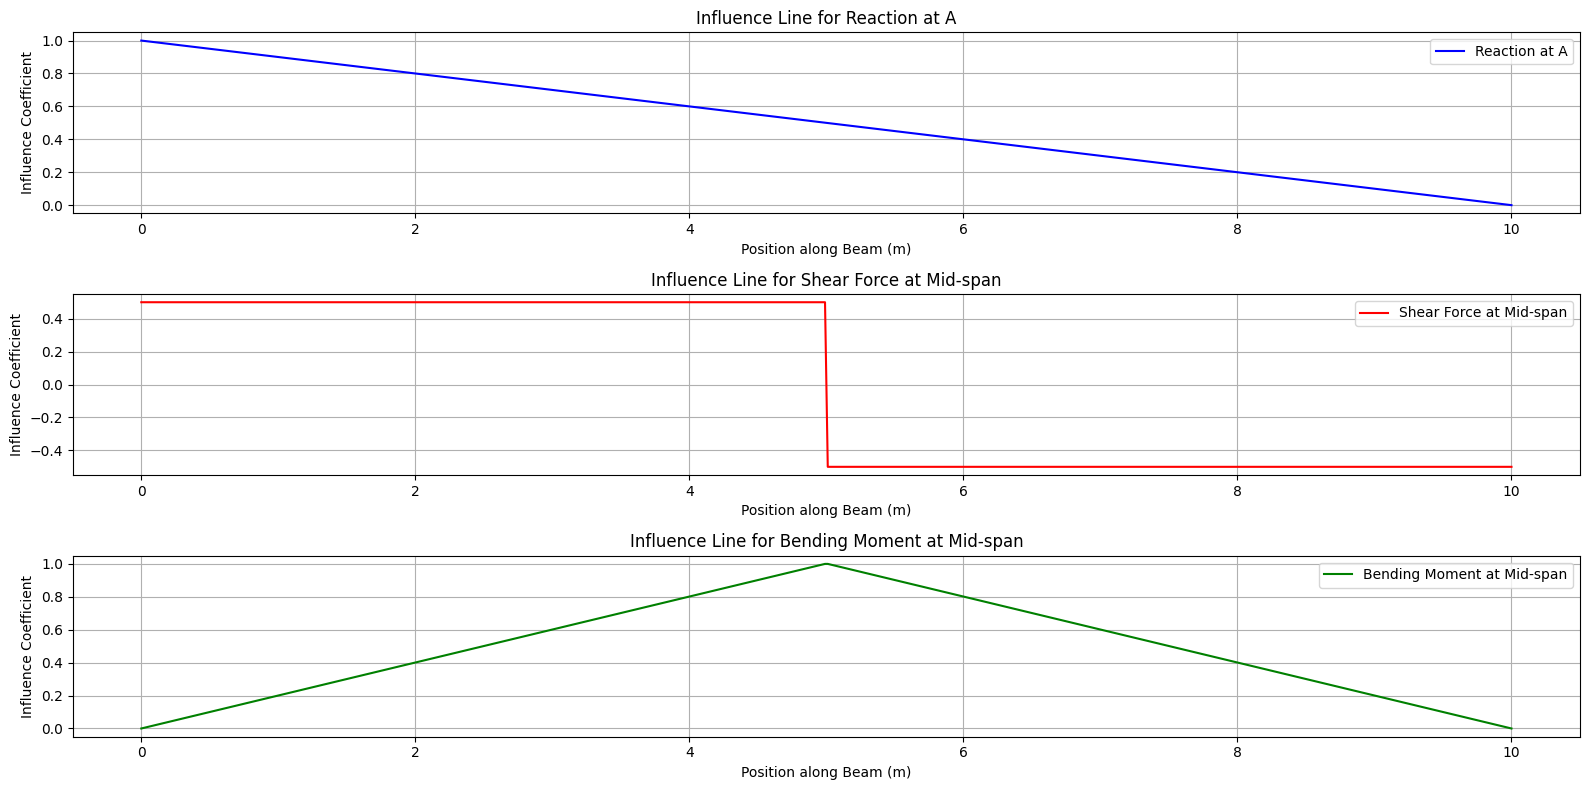

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_beam(L, W1, W2, x):
    """
    Analyze a simply supported beam with two moving loads.
    L : Length of beam (m)
    W1, W2 : Moving loads (kN)
    x : Distance between W1 and W2 (m)
    """

    # Maximum Reactions (using Influence Line method)
    # Load closest to A gives higher reaction at A
    Reaction_A = (W1 * (L - x) + W2 * L) / L
    Reaction_B = (W1 * x + W2 * 0) / L

    # Bending Moment BM_01 at W1 = 0 (i.e., at A)
    BM_01 = 0  # No moment at support

    # Shear Force SF_01 at mid-span (L/2)
    SF_01 = Reaction_A - W1 if (L/2) > x else Reaction_A

    # Finding maximum shear force and bending moment
    # Maximum shear when load is just left/right of L/2
    SF_max = max(W1, W2)
    y = (L / 2) + (x / 2)  # Approximate location for max SF

    # Maximum bending moment at center (approx)
    BM_max = (W1 + W2) * L / 4
    z = L / 2  # Location at mid-span for maximum moment

    # Printing Results
    print("\nAnalysis Results:")
    print(f"Maximum Reaction at A (kN): {Reaction_A:.2f}")
    print(f"Maximum Reaction at B (kN): {Reaction_B:.2f}")
    print(f"Bending Moment BM_01 (kNm): {BM_01:.2f}")
    print(f"Shear Force SF_01 (kN): {SF_01:.2f}")
    print(f"Maximum Shear Force SF_max (kN): {SF_max:.2f}")
    print(f"Location of Max SF from A (m): {y:.2f}")
    print(f"Maximum Bending Moment BM_max (kNm): {BM_max:.2f}")
    print(f"Location of Max BM from A (m): {z:.2f}")

    # Plotting Influence Line Diagrams
    plot_influence_lines(L)

def plot_influence_lines(L):
    """
    Plot Influence Line Diagrams for Reaction at A, Shear at Mid-Span, and Bending Moment at Mid-Span
    """

    x = np.linspace(0, L, 500)

    # Reaction at A ILD (straight line from 1 to 0)
    reaction_A_ILD = 1 - (x / L)

    # Shear at mid-span ILD
    shear_ILD = np.piecewise(x, [x < L/2, x >= L/2], [lambda x: 0.5, lambda x: -0.5])

    # Bending moment at mid-span ILD
    moment_ILD = np.piecewise(x, [x <= L/2, x > L/2],
                              [lambda x: (2 * x) / L,
                               lambda x: (2 * (L - x)) / L])

    plt.figure(figsize=(16, 8))

    # Reaction at A
    plt.subplot(3, 1, 1)
    plt.plot(x, reaction_A_ILD, 'b', label='Reaction at A')
    plt.title('Influence Line for Reaction at A')
    plt.xlabel('Position along Beam (m)')
    plt.ylabel('Influence Coefficient')
    plt.grid(True)
    plt.legend()

    # Shear Force at Mid-span
    plt.subplot(3, 1, 2)
    plt.plot(x, shear_ILD, 'r', label='Shear Force at Mid-span')
    plt.title('Influence Line for Shear Force at Mid-span')
    plt.xlabel('Position along Beam (m)')
    plt.ylabel('Influence Coefficient')
    plt.grid(True)
    plt.legend()

    # Bending Moment at Mid-span
    plt.subplot(3, 1, 3)
    plt.plot(x, moment_ILD, 'g', label='Bending Moment at Mid-span')
    plt.title('Influence Line for Bending Moment at Mid-span')
    plt.xlabel('Position along Beam (m)')
    plt.ylabel('Influence Coefficient')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Sample run
if __name__ == "__main__":
    L = float(input("Enter the length of the beam (m): "))
    W1 = float(input("Enter the moving load W1 (kN): "))
    W2 = float(input("Enter the moving load W2 (kN): "))
    x = float(input("Enter the distance between W1 and W2 (m): "))

    analyze_beam(L, W1, W2, x)
1